In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from pmdarima.arima.utils import ndiffs
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf

In [72]:
url = "C:\\Users\\ajord\\Documents\\Global_CO2_Emissions.csv"
df = pd.read_csv(url, delimiter=",")
df.head(5)

,year,co2
0,1965.0,11189.7
1,1966.0,11694.9
2,1967.0,12055.5
3,1968.0,12701.5
4,1969.0,13483.7


In [73]:
df.year = pd.to_datetime(df.year, format= '%Y')
df.head()

,year,co2
0,1965-01-01,11189.7
1,1966-01-01,11694.9
2,1967-01-01,12055.5
3,1968-01-01,12701.5
4,1969-01-01,13483.7


In [74]:
result = adfuller(df.co2.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.425504
p-value: 0.569990


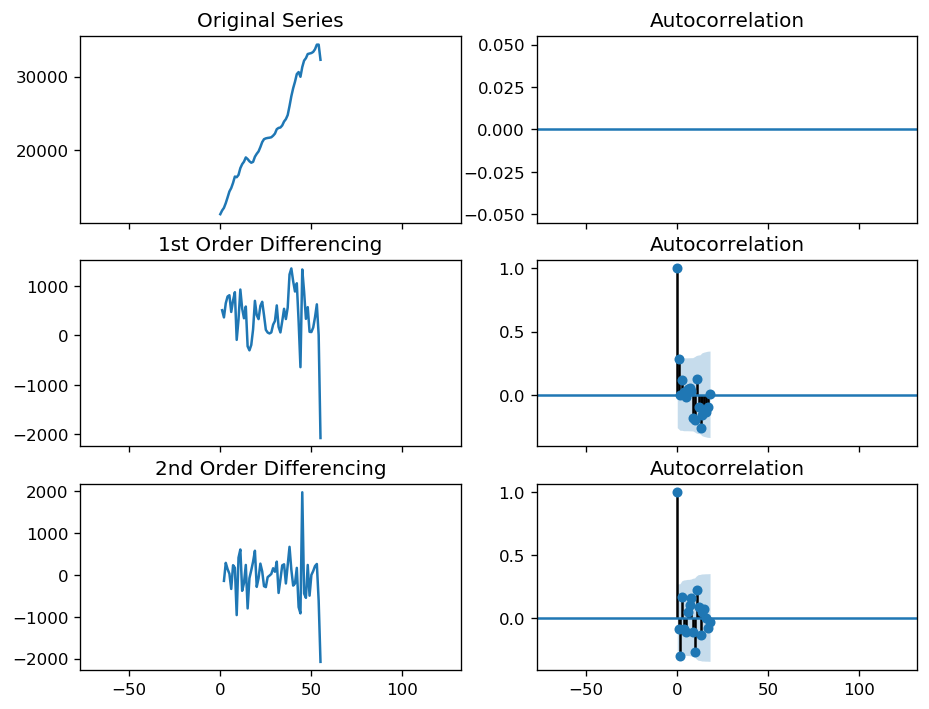

In [75]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.co2); axes[0, 0].set_title('Original Series')
plot_acf(df.co2, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.co2.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.co2.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.co2.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.co2.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [76]:
# y = df.co2

# ## Adf Test
# ndiffs(y, test='adf')  # 2

# # KPSS test
# ndiffs(y, test='kpss')  # 0

# # PP test:
# ndiffs(y, test='pp')  # 2

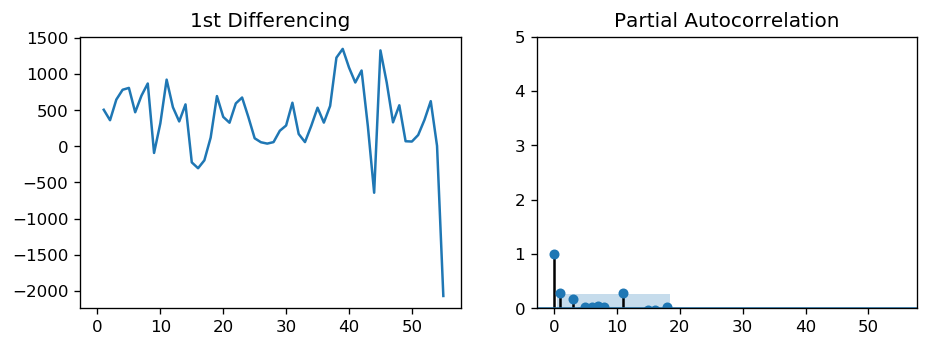

In [77]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.co2.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.co2.diff().dropna(), ax=axes[1])

plt.show()

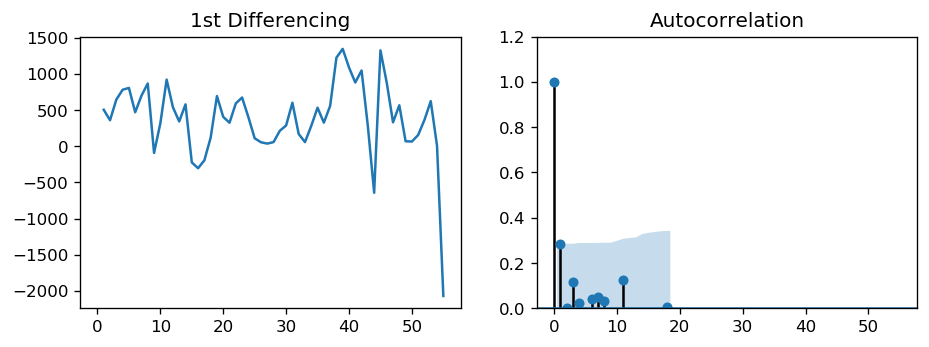

In [78]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.co2.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.co2.diff().dropna(), ax=axes[1])

plt.show()

In [79]:
model = ARIMA(df.co2.dropna(), order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.co2   No. Observations:                   55
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -415.552
Method:                       css-mle   S.D. of innovations            459.095
Date:                Sun, 31 Oct 2021   AIC                            839.104
Time:                        23:18:14   BIC                            847.133
Sample:                             1   HQIC                           842.209
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         364.4715     97.539      3.737      0.000     173.298     555.645
ar.L1.D.co2    -0.1410      0.250     -0.563      0.576      -0.632       0.350
ma.L1.D.co2     0.8000      0.147      5.429    

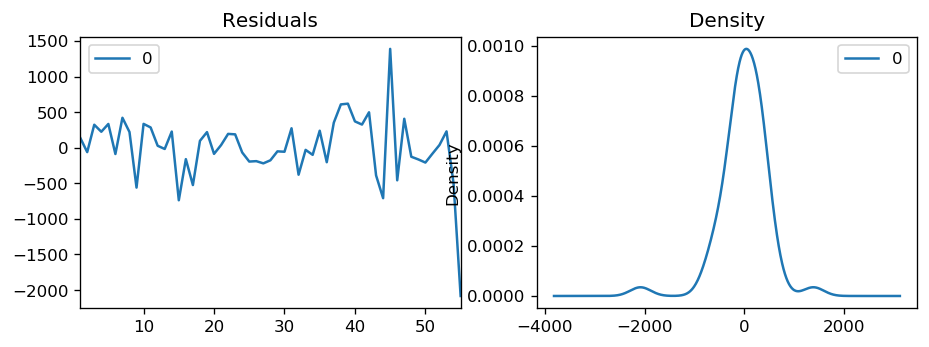

In [80]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

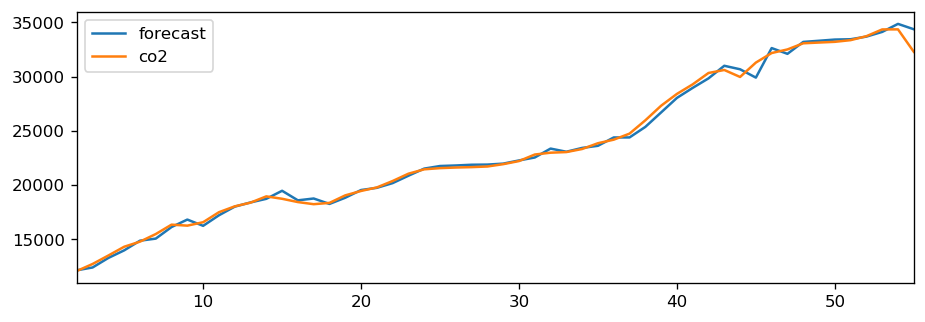

In [81]:
model_fit.plot_predict(dynamic=False)
plt.show()

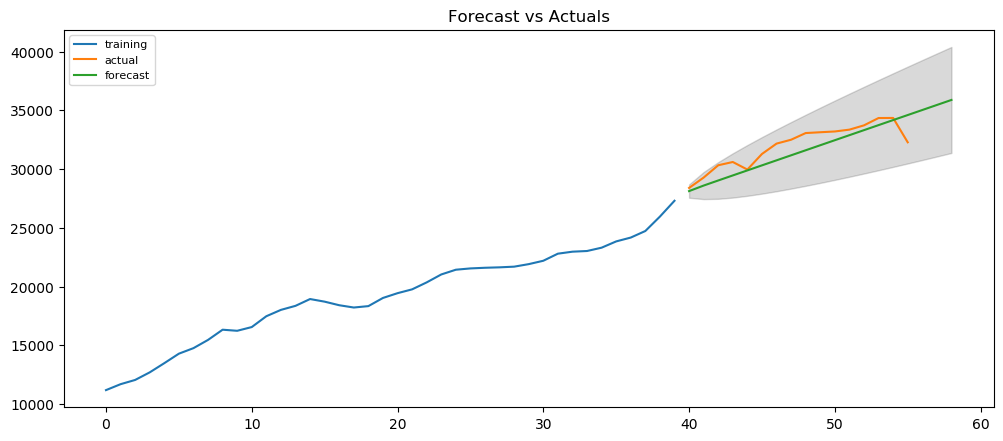

In [82]:
# Create Training and Test
train = df.co2[:40]
test = df.co2[40:]

# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(19, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [83]:
from statsmodels.tsa.arima_model import ARMA

import itertools
p = q = range(0, 4)
pq = itertools.product(p, q)
for param in pq:
    try:
        mod = ARMA(df.co2.dropna(),order=param)
        results = mod.fit()
        print('ARMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue

ARMA(0, 0) - AIC:1150.0615051383152
ARMA(0, 1) - AIC:1081.1334028052268
ARMA(1, 0) - AIC:895.7148123697533


C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARMA(1, 1) - AIC:870.3800053828353
ARMA(1, 2) - AIC:871.3881527956654
ARMA(2, 0) - AIC:869.2570680301442
ARMA(2, 1) - AIC:870.3561093561245


C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARMA(2, 3) - AIC:868.5957625118193


C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARMA(3, 0) - AIC:873.6042705952098


C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:695: RuntimeWarning: divide by zero encountered in log
  The ma coeffecients of an (AR)MA model.


ARMA(3, 1) - AIC:870.9523001049562
ARMA(3, 2) - AIC:879.1538633831888


C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\tools\numdiff.py:243: RuntimeWarning: invalid value encountered in subtract
  **kwargs)).imag/2./hess[i, j]
C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  """
C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  Inverse of the Jones reparameterization
C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:225: RuntimeWarning: invalid value encountered in log
  else:
C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:225: RuntimeWarning: invalid value encountered in true_divide
  else:
C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\tools\numdiff.py:243: RuntimeWarning: invalid value encountered in multiply
  **kwargs)).imag/2./hess[i, j]
C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\base\mo

                             ARIMA Model Results                              
Dep. Variable:                  D.co2   No. Observations:                   39
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -274.406
Method:                       css-mle   S.D. of innovations            261.448
Date:                Sun, 31 Oct 2021   AIC                            562.811
Time:                        23:18:17   BIC                            574.456
Sample:                             1   HQIC                           566.989
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         431.7048     85.013      5.078      0.000     265.082     598.328
ar.L1.D.co2     0.2575      0.228      1.130      0.267      -0.189       0.704
ar.L2.D.co2    -0.6324      0.166     -3.809    

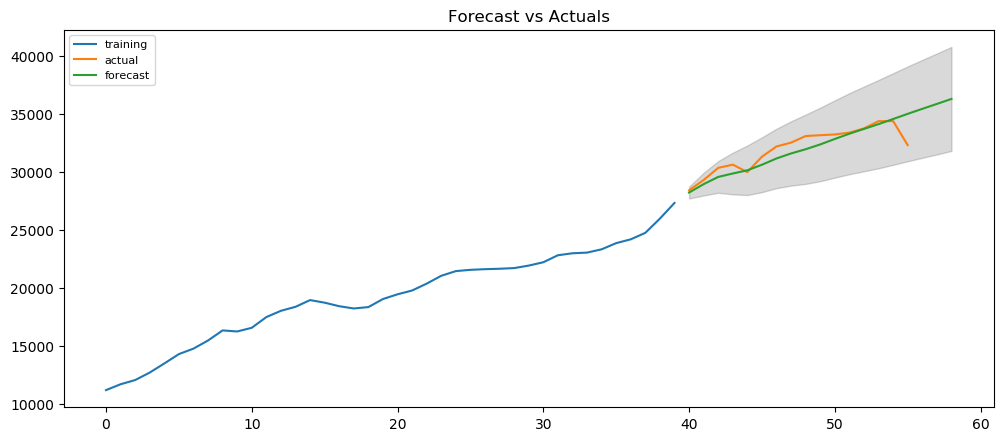

In [84]:
model = ARIMA(train, order=(2, 1, 3))  
fitted = model.fit(disp=-1) 
print(fitted.summary()) 

# Forecast
fc, se, conf = fitted.forecast(19, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [85]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'Mean Absolute Percentage Error':mape, 'Mean Error':me, 'Mean Absolute Error': mae, 
            'Mean Percentage Error ': mpe, 'Root Mean Squared Error':rmse, 'Lag 1 Autocorrelation of Error ':acf1, 
            'corr':corr, 'Min-Max Error':minmax})

In [86]:
test = df.co2[40:]
fc, se, conf = fitted.forecast(19, alpha=0.05)

forecast_accuracy(fc, test)



C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


{'Mean Absolute Percentage Error': 0.020506654292122964,
 'Mean Error': -276.77203386114206,
 'Mean Absolute Error': 655.9484087263918,
 'Mean Percentage Error ': -0.008756699395206768,
 'Root Mean Squared Error': 910.291608529177,
 'Lag 1 Autocorrelation of Error ': nan,
 'corr': nan,
 'Min-Max Error': nan}

In [87]:
# predictions = fitted.forecast(50, alpha=0.05)[0]
# pred_series = pd.Series(predictions, index=test.index)
# print(pred_series)